In [22]:
from skimage import io, color
import numpy as np
import matplotlib.pyplot as plt
import math
from skimage.transform import rotate, EuclideanTransform, SimilarityTransform, warp, swirl, matrix_transform
from skimage.filters import threshold_otsu
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk 
from skimage import img_as_float




In [2]:
def show_comparison(original, transformed, transformed_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(transformed)
    ax2.set_title(transformed_name)
    ax2.axis('off')
    io.show()

### Exercise 1
Read the NusaPenida.png image and call it im_org. It can be rotated by:

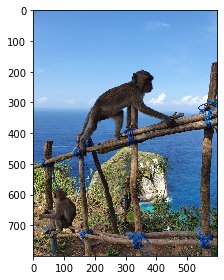

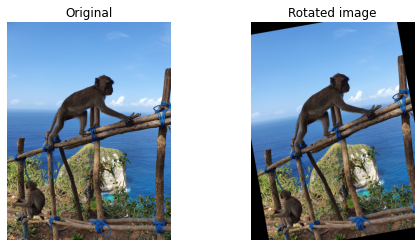

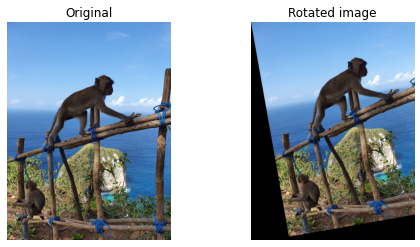

In [3]:
monkey = io.imread('data/NusaPenida.png')
io.imshow(monkey)
io.show()

# angle in degrees - counter clockwise
# This function works in degrees
rotation_angle = 10
rotated_monkey = rotate(monkey, rotation_angle)
show_comparison(monkey, rotated_monkey, "Rotated image")

#By default, the image is rotated around the center of the image. 
#This can be changed by manually specifying the point that the image should be rotated around (here (0, 0)):
rot_center = [0, 0]
rotated_monkey2 = rotate(monkey, rotation_angle, center=rot_center)
show_comparison(monkey, rotated_monkey2, "Rotated image")

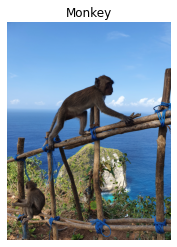

In [4]:
plt.figure(figsize=(4, 4))
plt.axis('off')
plt.imshow(monkey)
plt.title('Monkey')
plt.show()

### Exercise 2
Experiment with different center points and notice the results.

As seen, there are areas of the rotated image that is filled with a background value. It can be controlled how this background filling shall behave.

Here the background filling mode is set to reflect

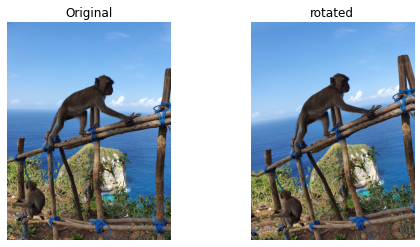

In [5]:
rotated_monkey3 = rotate(monkey, rotation_angle, mode="reflect")
show_comparison(monkey, rotated_monkey3, 'rotated')


### Exercise 3
Try the rotation with background filling mode reflect and wrap and notice the results and differences.

It is also possible to define a constant fill value. Currently, sci-kit image only supports a single value (not RGB).

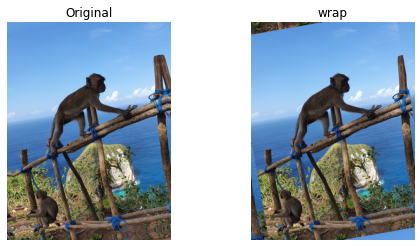

In [6]:
rotated_wrap = rotate(monkey, rotation_angle, mode="wrap")
show_comparison(rotated_monkey3, rotated_wrap, 'wrap')

### Exercise 4
Try to use the code below

with different values of cval and notice the outcomes.

By default, the rotated output image has the same size as the input image and therefore some parts of the rotated image are cropped away. It is possible to automatically adjust the output size, so the rotated image fits into the resized image.

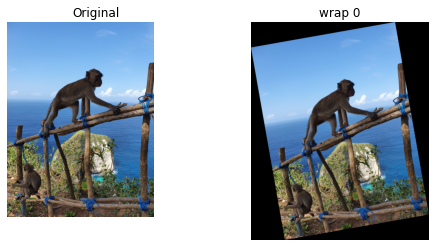

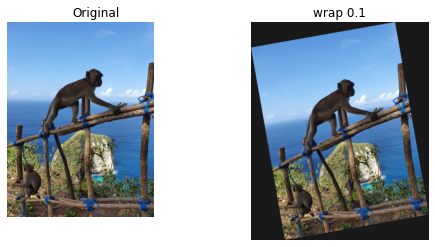

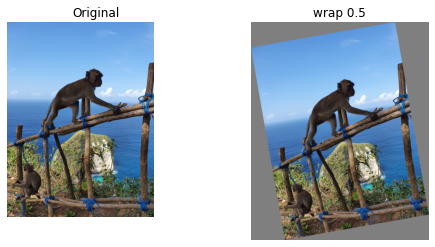

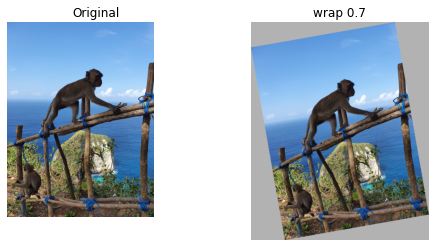

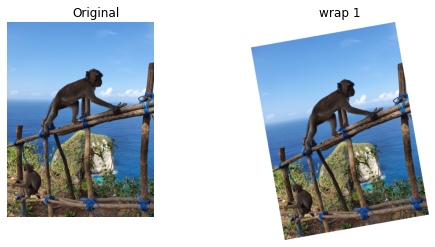

In [7]:
for val in [0,0.1,0.5,0.7,1]:
    rotated_constant = rotate(monkey, rotation_angle, 
                              resize=True, mode="constant", cval=val)
    show_comparison(monkey, rotated_constant, f'wrap {val}')





### Exercise 5
Test the use of automatic resizing:

also combine resizing with different background filling modes.

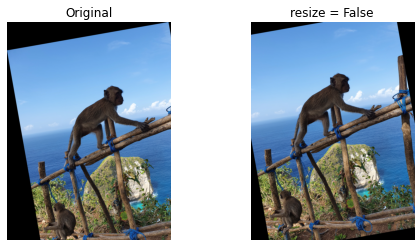

In [8]:
rotated_img_resize = rotate(monkey, rotation_angle, resize=True)
rotated_img_notresize = rotate(monkey, rotation_angle, resize=False)
show_comparison(rotated_img_resize, rotated_img_notresize, 'resize = False')

## Euclidean image transformation
An alternative way of doing geometric image transformations is to first construct the transformation and then apply it to the image. We will start by the Euclidean image transformation that consists of a rotation and a translation. It is also called a rigid body transformation.

### Exercise 6
Start by defining the transformation:

it can be seen in the print statement that the transformation consists of a 3 x 3 matrix. The matrix is used to transform points using homogenous coordinates. Notice that the angle is defined in radians in this function.

In [9]:
#angle in radians - counter clockwise
rotation_angle = 10.0 * math.pi / 180.
trans = [10, 20]
tform = EuclideanTransform(rotation=rotation_angle, translation=trans)
print(tform.params)

[[ 0.98480775 -0.17364818 10.        ]
 [ 0.17364818  0.98480775 20.        ]
 [ 0.          0.          1.        ]]


### Exercise 7
The computed transform can be applied to an image using the warp function:

Note: The warp function actually does an inverse transformation of the image, since it uses the transform to find the pixels values in the input image that should be placed in the output image.

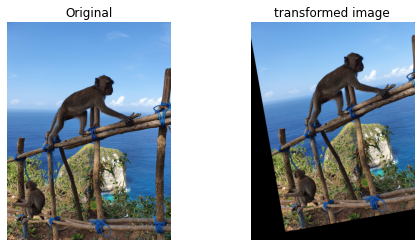

In [10]:
transformed_img = warp(monkey, tform)
show_comparison(monkey,transformed_img,'transformed image')

## Inverse transformation
It is possible to get the inverse of a computed transform by using tform.inverse. An image can then be transformed using the invers transform by:



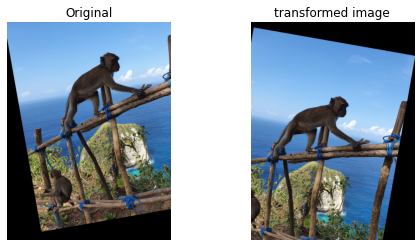

In [11]:
inverse_transformed_img = warp(monkey, tform.inverse)
show_comparison(transformed_img,inverse_transformed_img,'transformed image')

### Exercise 8
Construct a Euclidean transformation with only rotation. Test the transformation and the invers transformation and notice the effect.

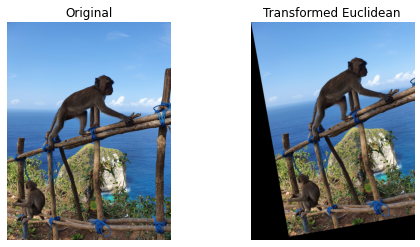

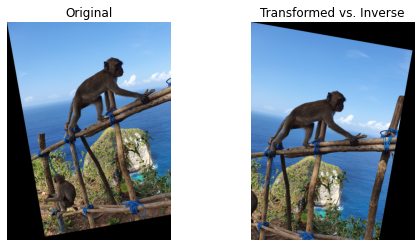

In [12]:
#angle in radians - counter clockwise
rotation_angle = 10.0 * math.pi / 180.
trans = [10, 20]
tform2 = EuclideanTransform(rotation=rotation_angle)

transform_img2 = warp(monkey, tform2)
inverse_img2 = warp(monkey, tform2.inverse)
show_comparison(monkey, transform_img2, 'Transformed Euclidean')
show_comparison(transform_img2, inverse_img2, 'Transformed vs. Inverse')

## Similarity transform of image
The SimilarityTransform computes a transformation consisting of a translation, rotation and a scaling.

### Exercise 9
Define a SimilarityTransform with an angle of 15 degrees, a translation of (40, 30) and a scaling of 0.6 and test it on the image.

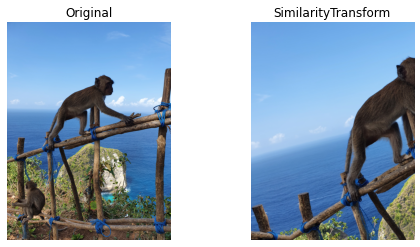

In [13]:
angle15 = 15.0 * math.pi / 180.
similarity = SimilarityTransform(scale=0.6, rotation=angle15, translation=[40,30])

transSim = warp(monkey, similarity.params, mode='reflect')
show_comparison(monkey, transSim, 'SimilarityTransform')

## The swirl image transformation
The swirl image transform is a non-linear transform that can create interesting visual results on images.

### Exercise 10
Try the swirl transformation:

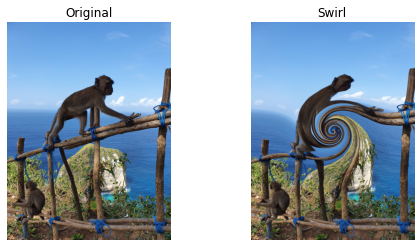

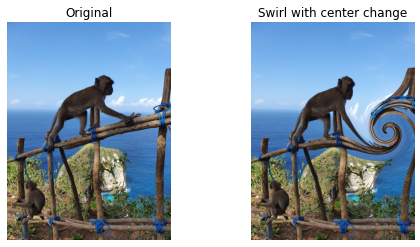

In [14]:
str = 10
rad = 300
swirl_img1 = swirl(monkey, strength=str, radius=rad)
#it is also possible to change the center of the swirl:
show_comparison(monkey, swirl_img1, 'Swirl')

str = 10
rad = 300
c = [500, 400]
swirl_img2 = swirl(monkey, strength=str, radius=rad, center=c)
#try with different centers and notice the results.
show_comparison(monkey, swirl_img2, 'Swirl with center change')

## Landmark based registration
The goal of landmark based registration is to align two images using a set of landmarks placed in both images. The landmarks need to have correspondence meaning that the landmarks should be placed on the same anatomical spot in the two images.

There are two photos of hands: Hand1.jpg and Hand2.jpg and the goal is to transform Hand1 so it fits on top of Hand2. In this exercise we call Hand1 one for the source (src) and Hand2 for the destination (dst).

### Exercise 11
Start by reading the two images into src_img and dst_img. Visualize their overlap by:

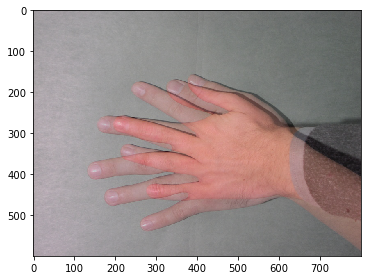

In [15]:
hand1_img = io.imread('data/Hand1.jpg')
hand2_img = io.imread('data/Hand2.jpg')
blend = 0.5 * img_as_float(hand1_img) + 0.5 * img_as_float(hand2_img)
io.imshow(blend)
io.show()

## Manual landmark annotation
We will manually placed landmarks on the two images to align the them.

### Exercise 12
We have manually placed a set of landmarks on the source image. They can be visualized by:

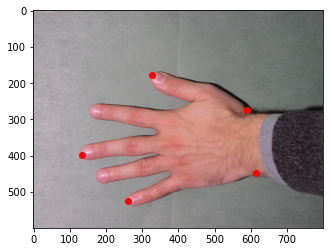

In [16]:
hand1 = np.array([[588, 274], [328, 179], [134, 398], [260, 525], [613, 448]])

plt.imshow(hand1_img)
plt.plot(hand1[:, 0], hand1[:, 1], '.r', markersize=12)
plt.show()

### Exercise 13
You should now place the same landmarks on the destination image.

In imshow you can see the pixel coordinates of the cursor:

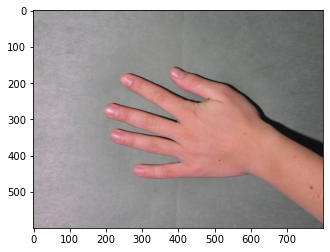

In [17]:
# uncomment below to use curver for coordinates 
#%matplotlib notebook
plt.imshow(hand2_img)

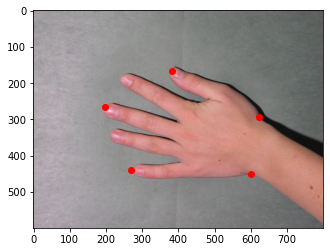

In [28]:
#hand2 = np.array([[623, 297], [384, 164], [197, 276], [277, 443], [593, 451]])
hand2 = np.array([[621, 293], [382, 166], [198, 266], [270, 440], [600, 450]])
plt.imshow(hand2_img)
plt.plot(hand2[:, 0], hand2[:, 1], '.r', markersize=12)
plt.show()

Use this to find the coordinates of the sought landmarks and put them into a dst variable.

Plot the landmarks to verify they are correct:

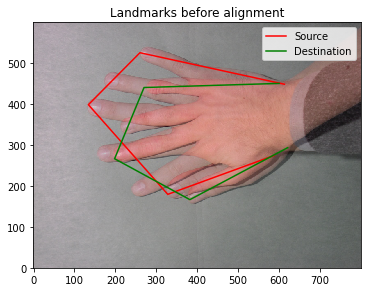

In [34]:
fig, ax = plt.subplots()
io.imshow(blend)
ax.plot(hand1[:, 0], hand1[:, 1], '-r', markersize=12, label="Source")
ax.plot(hand2[:, 0], hand2[:, 1], '-g', markersize=12, label="Destination")
ax.invert_yaxis()
ax.legend()
ax.set_title("Landmarks before alignment")
plt.show()

To calculate how well two sets of landmarks are aligned, we can compute the objective function:
$$ F = \sum^N_{i=1}|a_i-b_i|^2 $$
here $a_i$ are the landmarks in the destination image and $b_i$ are the landmarks in the source image.

### Exercise 14
Compute $F$ from your landmarks. It can for example be done like:

In [30]:
e_x = hand1[:, 0] - hand2[:, 0]
error_x = np.dot(e_x, e_x)
e_y = hand1[:, 1] - hand2[:, 1]
error_y = np.dot(e_y, e_y)
f = error_x + error_y
print(f"Landmark alignment error F: {f}")

#The optimal Euclidean transformation that brings the source landmarks over in the 
# destination landmarks can be found by:
tform = EuclideanTransform()
tform.estimate(hand1, hand2)

#The found transform can be applied to the source points by:

hand1_transform = matrix_transform(hand2, tform.params)

Landmark alignment error F: 33553


### Exercise 15
Visualize the transformed source landmarks together with the destination landmarks. Also compute the objective function  using the transformed points. What do you observe?

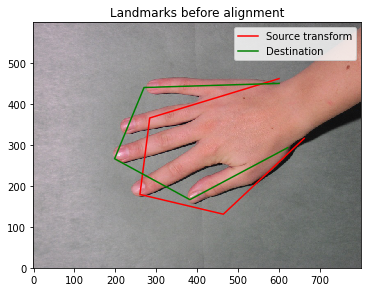

In [33]:
fig, ax = plt.subplots()
io.imshow(hand2_img)
ax.plot(hand1_transform[:, 0], hand1_transform[:, 1], '-r', markersize=12, label="Source transform")
ax.plot(hand2[:, 0], hand2[:, 1], '-g', markersize=12, label="Destination")
ax.invert_yaxis()
ax.legend()
ax.set_title("Landmarks before alignment")
plt.show()

### Exercise 16
We can now apply the transformation to the source image. Notice that we use the inverse transform due to the inverse mapping in the image resampling:

Show the warped image and also try to blend the warped image destination image like in exercise 11. What do you observe?

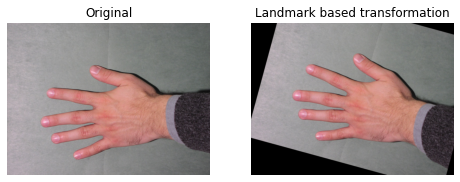

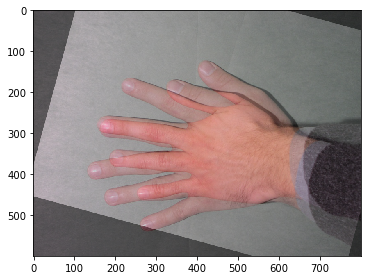

In [38]:
warped = warp(hand1_img, tform.inverse)
show_comparison(hand1_img, warped, 'Landmark based transformation')

blend = 0.5 * img_as_float(hand1_img) + 0.5 * img_as_float(warped)
io.imshow(blend)
io.show()